In [ ]:
# conda activate rca
'''
Moondream2
'''
from PIL import Image
import requests
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.image_utils import load_image
import sys
import os
from transformers import AutoConfig
import json
import requests
from safetensors.torch import load_file


# Add the desired directory to the Python path
sys.path.append(os.path.abspath('/data/students/earl/llava-dissector/moondream/moondream/torch'))

from moondream import MoondreamModel
from config import MoondreamConfig
from hf_moondream import HfConfig, HfMoondream as HFMoondream

from weights import load_weights_into_model, safetensors_open, _load_weights


from huggingface_hub import hf_hub_download
import torch
import json

# Download config.json
config_path = hf_hub_download(repo_id="vikhyatk/moondream2", filename="config.json")
#config_path = "/data/students/earl/llava-dissector/moondream/moondream/config/config_md2.json"
with open(config_path, "r") as f:
    config_dict = json.load(f)
config = MoondreamConfig.from_dict(config_dict)


# Initialize model
model = HFMoondream.from_pretrained("vikhyatk/moondream2")
device = torch.device("cuda:0")  # Use GPU from CUDA_VISIBLE_DEVICES
model.to(device)

# Load and process the image
url = "https://farm3.staticflickr.com/2402/2480652763_e6b62303ee_z.jpg"
#url = "https://huggingface.co/microsoft/kosmos-2-patch14-224/resolve/main/snowman.jpg"
image = load_image(url)  # Load image from URL

cls = "baseball glove"
objects = model.detect(image, cls)
print(f'Response: {objects}\n')
print(f"Found {len(objects['objects'])} {cls}")


/data/students/earl/anaconda3/envs/deepseek/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Response: {'objects': [{'x_min': 0.7463045734912157, 'y_min': 0.5057830344885588, 'x_max': 0.7634610515087843, 'y_max': 0.5293732155114412}]}

Found 1 baseball glove


## Visualize

Bounding Box: (0.7463045734912157, 0.5057830344885588, 0.7634610515087843, 0.5293732155114412)


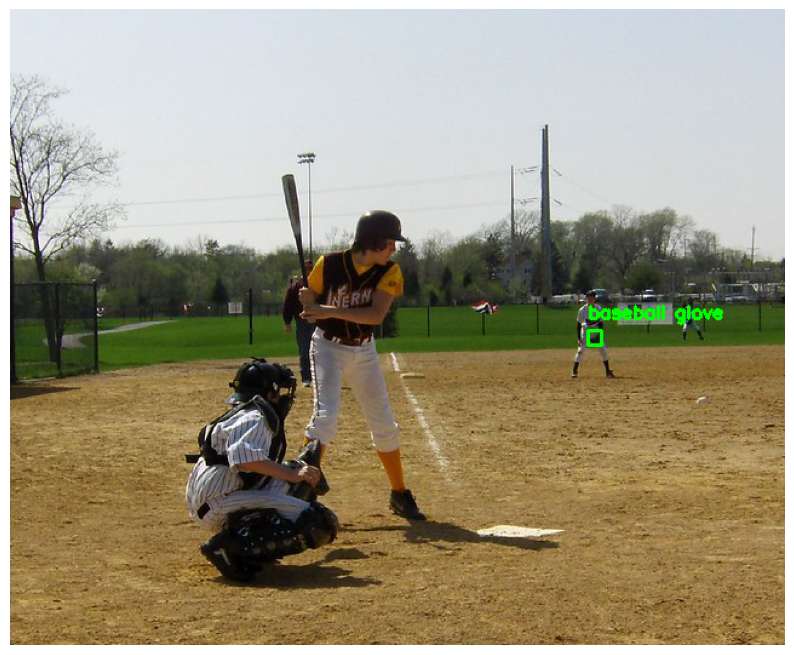

In [ ]:
# For each detected object, print the bounding box coordinates
for obj in objects['objects']:
    x_min = obj['x_min']
    y_min = obj['y_min']
    x_max = obj['x_max']
    y_max = obj['y_max']
    print(f"Bounding Box: ({x_min}, {y_min}, {x_max}, {y_max})")

# Convert the bounding boxes to pixel coordinates
for obj in objects['objects']:
    x_min = int(obj['x_min'] * image.size[0])
    y_min = int(obj['y_min'] * image.size[1])
    x_max = int(obj['x_max'] * image.size[0])
    y_max = int(obj['y_max'] * image.size[1])
    obj['bbox'] = [x_min, y_min, x_max, y_max]
    # If you want to add a label, set it here, e.g.:
    obj['label'] = cls  # or any label you want

# Using cv2 to draw bounding boxes on the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_cv = np.array(image) #cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
for obj in objects['objects']:
    box = obj['bbox']
    label = obj.get('label', 'object')
    cv2.rectangle(image_cv, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
    cv2.putText(image_cv, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image_cv)
plt.axis('off')
plt.show() 